# Analýza zákazníků

Máme k dispozici seznam zákazníků s jejich osobními informacemi a jejich chováním.

Na trh chceme uvést nový luxusní a drahý výrobek. 

Na které zákazníky máme zaměřit personalizovaný marketing?

# Úkol
- Proveďte základní analýzu dat a jejich vizualizaci
- Proveďte úpravu dat (encoding)
- Vyberte vhodné proměnné, podle kterých půjdou zákazníci segmentovat
- Vytvořte k-mean model s vhodným počtem segmentů
- Vizualizujte model
- Který segment je cílový?

# Načtení dat

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [8]:
data=pd.read_csv('..\\dataset\\Mall_Customers.csv')

# Popis  dat
- informace o datech
- náhled na data
- základní statistika
- zobrazení distribuce dat

# Příprava dat
- ošetření NaN hodnot
- encodování textových sloupců

# Výběr proměnných
- zobrazení vztahů mezi proměnnými (pairplot)
- hledáme kombinaci proměnných, které lze opticky ropzdělit do skupin
- vytvoření X pouze s těmito sloupci

# Zjištění parametru modelu k-mean
- vykreslení elbow grafu
- zjištění ideálního počtu clusterů

# k-mean model pro zjištěný počet clusterů
- natrénování modelu
- predikce dat

# Vizualizace modelu
- vykreslení obarvených skupin grafů

## Výklad modelu
- Popište jednotlivé skupiny
- Na jaké zákazníky se zaměřit?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster                 200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                   

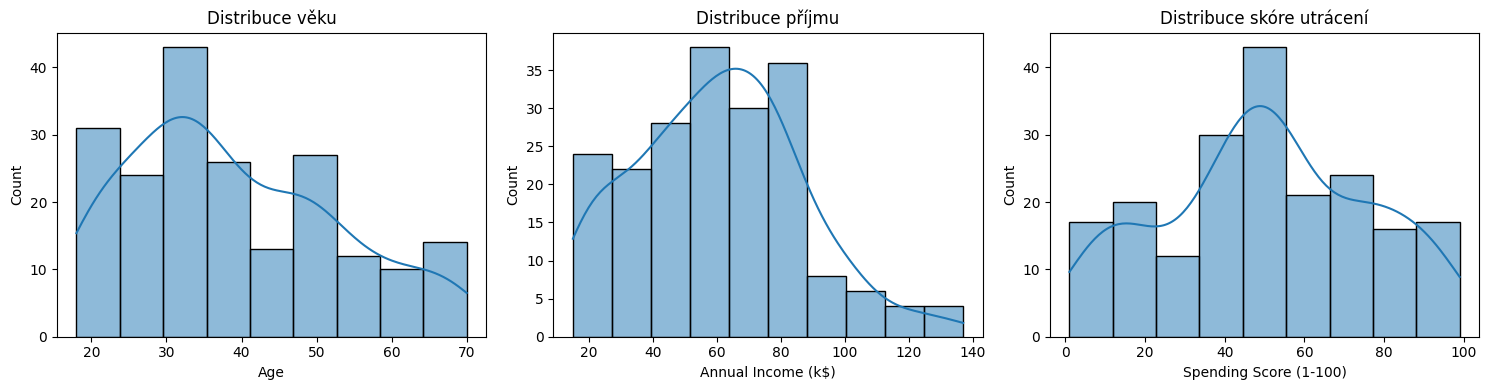

Počet chybějících hodnot v datech:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


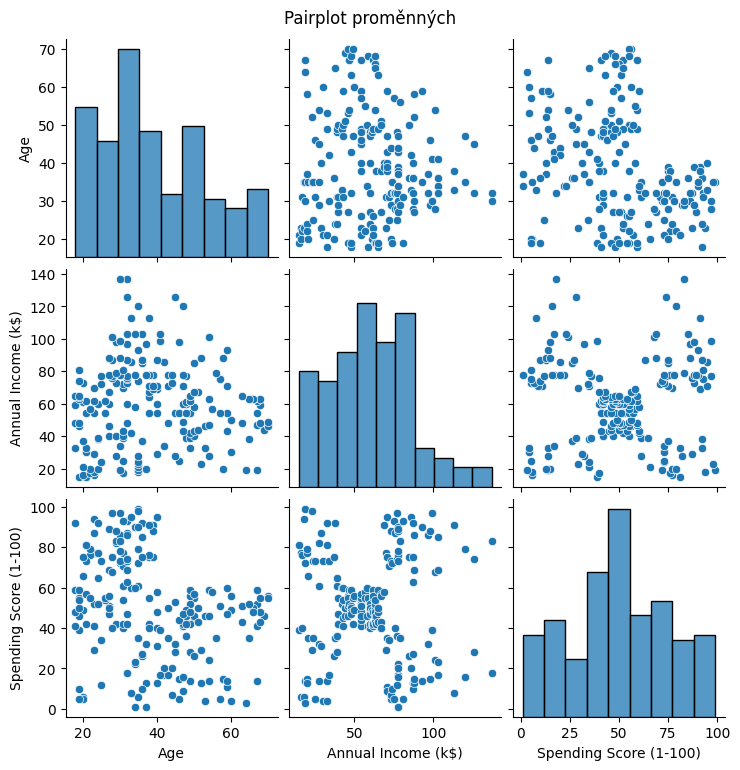

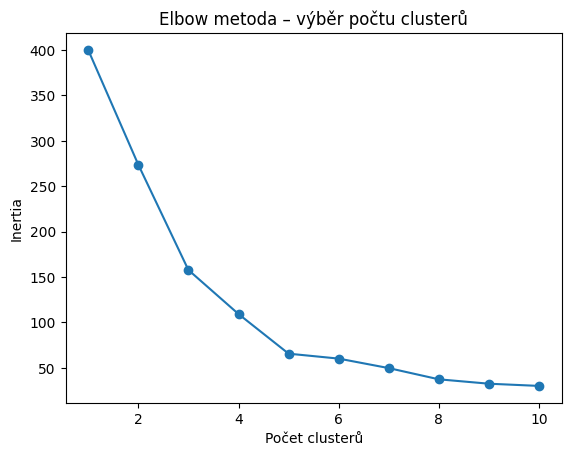

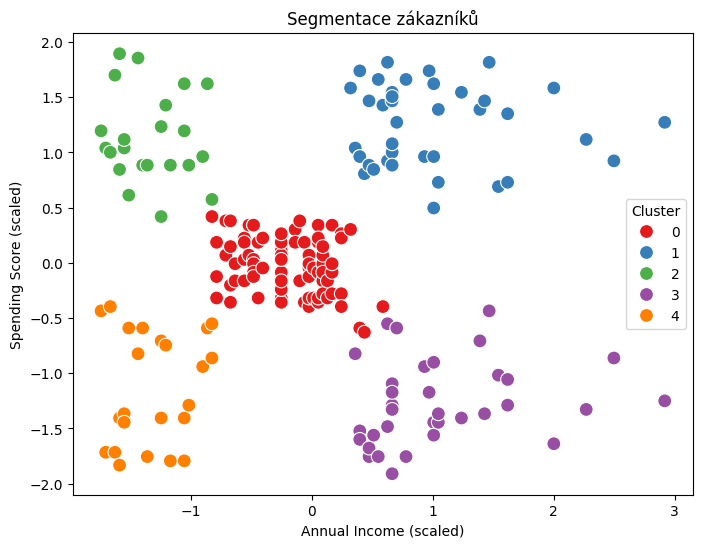


Průměrné hodnoty v jednotlivých clusterech:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043

Počet zákazníků v každém segmentu:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [20]:
# Základní přehled
print(data.info())
print(data.head())
print(data.describe())

# Vizualizace distribuce
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title("Distribuce věku")

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title("Distribuce příjmu")

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title("Distribuce skóre utrácení")
plt.tight_layout()
plt.show()

# Ošetření NaN hodnot
print("Počet chybějících hodnot v datech:\n", data.isnull().sum())

# Encodování pohlaví
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Muž = 1, Žena = 0

# Výběr proměnných a pairplot
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot proměnných", y=1.02)
plt.show()

# Vytvoření X a standardizace
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow metoda pro určení ideálního počtu clusterů
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow metoda – výběr počtu clusterů')
plt.xlabel('Počet clusterů')
plt.ylabel('Inertia')
plt.show()

# Trénink k-means modelu
optimal_k = 5  # podle grafu (měň dle potřeby)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Vizualizace segmentace
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Segmentace zákazníků')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()

# Shrnutí jednotlivých clusterů
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nPrůměrné hodnoty v jednotlivých clusterech:")
print(cluster_summary)

# Počet zákazníků v každém clusteru
print("\nPočet zákazníků v každém segmentu:")
print(data['Cluster'].value_counts())